In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization

In [21]:
train_data,val_data = tf.keras.utils.image_dataset_from_directory(
    'crop_files',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 60124 files belonging to 46 classes.
Using 48100 files for training.
Using 12024 files for validation.


In [ ]:
train_data

In [ ]:
val_data

In [22]:
model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.1))
# # model.add(Dense(num_classes))
# model.add(Dense(46, activation='softmax'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=46,activation='softmax'))


In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 46)                  │          69,046 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,854,770 (29.96 MB)

 Trainable params: 7,854,770 (29.96 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(units=38,activation='softmax'))


In [26]:
history  = model.fit(x = train_data , validation_data = val_data , epochs = 10,callbacks=[early_stopping])

Epoch 1/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 2416s 2s/step - accuracy: 0.4105 - loss: 2.2364 - val_accuracy: 0.7855 - val_loss: 0.6797
Epoch 2/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1910s 1s/step - accuracy: 0.7885 - loss: 0.6656 - val_accuracy: 0.8761 - val_loss: 0.3729
Epoch 3/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1633s 1s/step - accuracy: 0.8627 - loss: 0.4227 - val_accuracy: 0.8987 - val_loss: 0.3044
Epoch 4/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 6595s 4s/step - accuracy: 0.8977 - loss: 0.3084 - val_accuracy: 0.9196 - val_loss: 0.2347
Epoch 5/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 3926s 3s/step - accuracy: 0.9201 - loss: 0.2383 - val_accuracy: 0.9177 - val_loss: 0.2484
Epoch 6/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1676s 1s/step - accuracy: 0.9319 - loss: 0.1962 - val_accuracy: 0.9296 - val_loss: 0.2152
Epoch 7/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1675s 1s/step - accuracy: 0.9431 - loss: 0.1609 - val_accuracy: 0.9109 - val_loss: 0.2936
Epoch 8/10
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1669s 1s/step - accuracy: 0.9487 -

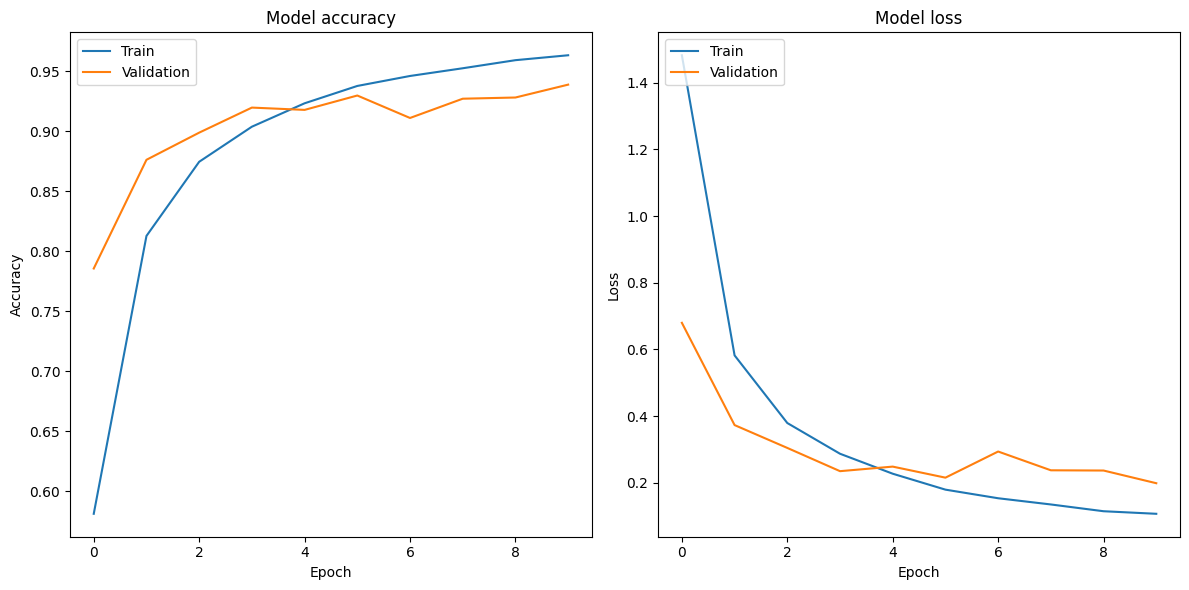

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [28]:
model.evaluate(val_data)

376/376 ━━━━━━━━━━━━━━━━━━━━ 189s 497ms/step - accuracy: 0.9414 - loss: 0.1959


[0.19854743778705597, 0.9387059211730957]

In [32]:
model.save("disease_model_01.keras")

In [33]:
import json
with open("model_hist01.json","w") as f:
    json.dump(history.history , f)

In [34]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_Blight',
 'Potato___Healthy',
 'Potato___Late_Blight',
 'Raspberry___healthy',
 'Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Leaf_Blast',
 'Rice___Neck_Blast',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Sugarcane_Bacterial Blight',
 'Sugarcane_Healthy',
 'Sugarcane_Red Rot',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato_

In [39]:
t1 ,test_data = tf.keras.utils.image_dataset_from_directory(
    'crop_files',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 60124 files belonging to 46 classes.
Using 48100 files for training.
Using 12024 files for validation.


In [40]:
y_pred = model.predict(test_data)

376/376 ━━━━━━━━━━━━━━━━━━━━ 188s 495ms/step


In [41]:
pred_category = tf.argmax(y_pred , axis = 1)

In [42]:
pred_category

<tf.Tensor: shape=(12024,), dtype=int64, numpy=array([44, 41,  3, ...,  1, 14, 42], dtype=int64)>

In [45]:
true_cat = tf.concat([y for x,y in  test_data] , axis = 0)
true_cat

<tf.Tensor: shape=(12024, 46), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [46]:
y_true = tf.argmax(true_cat , axis = 1)

In [47]:
y_true

<tf.Tensor: shape=(12024,), dtype=int64, numpy=array([44, 41,  3, ...,  1, 14, 42], dtype=int64)>

In [53]:
!pip install pydot
from tensorflow.keras.utils import plot_model
plot_model(model,show_layer_names=True,show_shapes=True)

In [55]:
from sklearn.metrics import confusion_matrix ,classification_report

In [54]:
print(classification_report(y_true,pred_category,target_names=class_names))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.83      0.92      0.87       126
                            Apple___Black_rot       0.98      0.98      0.98       132
                     Apple___Cedar_apple_rust       0.92      0.85      0.89        55
                              Apple___healthy       0.96      0.95      0.96       331
     Cherry_(including_sour)___Powdery_mildew       0.94      0.99      0.96       207
            Cherry_(including_sour)___healthy       0.93      0.96      0.94       179
                           Corn___Common_Rust       1.00      1.00      1.00       243
                        Corn___Gray_Leaf_Spot       0.93      0.68      0.79       104
                               Corn___Healthy       0.97      0.99      0.98       219
                  Corn___Northern_Leaf_Blight       0.85      0.94      0.89       198
                            Grape___Black_

In [ ]:
matrix = confusion_matrix(y_true , pred_category)